In [ ]:
!pip install scikit-optimize
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

<ipython-input-2-b46d91121558>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

In [ ]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [ ]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    ddd = pd.DataFrame({'test_lbl': test_label, 'pred_lbl':predicted_dv})
    sns.scatterplot(ddd, x='test_lbl', y='pred_lbl', color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [ ]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [ ]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [ ]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

### Load df

In [ ]:
import pickle

with open('/content/drive/My Drive/Diploma/CODE/dataset_FOREIGN_kws_oscr.pkl', 'rb') as f:
    df_kws = pickle.load(f, encoding='utf-8')

In [ ]:
df_kws.columns[:35]

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'element_uid', 'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating', 'джек', 'расследовать', 'подруга',
       'ограбление', 'катя', 'макс', 'мечтать', 'отважный'],
      dtype='object')

In [ ]:
df_kws.columns[-35:]

Index(['воришка', 'одри', 'деспотичный', 'хэл', 'шоубизнес', 'провоцировать',
       'селин', 'уолтер', 'непобедимый', 'молль', 'небывалый', 'ларри',
       'харпер', 'прихожанин', 'спецподразделение', 'сущий', 'пята',
       'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра',
       'сидень', 'беатрис', 'рыбка', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer'],
      dtype='object')

In [ ]:
df_kws.drop(columns=['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer'], axis=1, inplace=True)

In [ ]:
df_kws

,element_uid,джек,расследовать,подруга,ограбление,катя,макс,мечтать,отважный,фрэнк,...,вылечивать,землянин,рон,головоломка,крюк,чета,зебра,сидень,беатрис,рыбка
0,e785baa6-f175-42b4-9e16-4319ac7991d5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4593737e-de9c-40df-97db-fb3cf85a08ef,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11ba66db-e941-4c3a-8da6-d8900e56f8c7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ba6bec1a-3aa9-48c7-aa65-908c21627a12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,c9a2b583-f550-4eaf-aab8-43f36f06695a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10480,36e51c56-2e1c-4f27-b2a7-8dd533e40184,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10482,3778b733-3b91-40b0-a40f-a3e053d32df4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10487,0bfb5a13-50fc-48f3-b51a-a30971024651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('/content/drive/My Drive/Diploma/CODE/data/new_eng_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.shape

(8784, 40)

In [ ]:
df = df.merge(df_kws, on=['element_uid'])

In [ ]:
df.shape

(8784, 1040)

# Preprocessing

In [ ]:
prep_df = df.copy(deep=True)

In [ ]:
prep_df.shape

(8784, 1040)

In [ ]:
prep_df.isna().sum()

age_access_type      0
name                 0
director             3
genre                0
average_rating     337
                  ... 
чета                 0
зебра                0
сидень               0
беатрис              0
рыбка                0
Length: 1040, dtype: int64

### filter by year

In [ ]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

In [ ]:
prep_df.shape

(6773, 1040)

In [ ]:
prep_df.isna().sum()

age_access_type      0
name                 0
director             0
genre                0
average_rating     321
                  ... 
чета                 0
зебра                0
сидень               0
беатрис              0
рыбка                0
Length: 1040, dtype: int64

### topN

In [ ]:
import ast

columns = ['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
                      'OPERATOR', 'PRODUCER', 'WRITER', 'country', 'genre']
for col in columns:
    prep_df[col] = prep_df[col].apply(lambda x: ast.literal_eval(x) if not isinstance(x, float) else np.nan)

prep_df.dropna(subset=['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR', 'OPERATOR', 'PRODUCER', 'WRITER'],
              inplace=True)

In [ ]:
prep_df.shape

(4820, 1040)

In [ ]:
prep_df.isna().sum()

age_access_type      0
name                 0
director             0
genre                0
average_rating     118
                  ... 
чета                 0
зебра                0
сидень               0
беатрис              0
рыбка                0
Length: 1040, dtype: int64

In [ ]:
prep_df['DESIGN'][5]

['Тим Уорман', 'Ясмин Мустаклим', 'Тамми Саттон']

In [ ]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]

    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [ ]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [ ]:
prep_df.columns

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration',
       ...
       'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра',
       'сидень', 'беатрис', 'рыбка'],
      dtype='object', length=1040)

In [ ]:
top10genres, name = add_topN_feature(prep_df, 'genre', 10)
prep_df = ohe_topN_features(prep_df, top10genres, name)

top5countries, name = add_topN_feature(prep_df, 'country', 5)
prep_df = ohe_topN_features(prep_df, top5countries, name)

top10actors, name = add_topN_feature(prep_df, 'ACTOR', 10)
prep_df = ohe_topN_features(prep_df, top10actors, name)

top3directors, name = add_topN_feature(prep_df, 'COMPOSER', 3)
prep_df = ohe_topN_features(prep_df, top3directors, name)

top2DESIGN, name = add_topN_feature(prep_df, 'DESIGN', 2)
prep_df = ohe_topN_features(prep_df, top2DESIGN, name)

top2DIRECTOR, name = add_topN_feature(prep_df, 'DIRECTOR', 2)
prep_df = ohe_topN_features(prep_df, top2DIRECTOR, name)

top2EDITOR, name = add_topN_feature(prep_df, 'EDITOR', 2)
prep_df = ohe_topN_features(prep_df, top2EDITOR, name)

top2OPERATOR, name = add_topN_feature(prep_df, 'OPERATOR', 2)
prep_df = ohe_topN_features(prep_df, top2OPERATOR, name)

top3PRODUCER, name = add_topN_feature(prep_df, 'PRODUCER', 3)
prep_df = ohe_topN_features(prep_df, top3PRODUCER, name)

top2WRITER, name = add_topN_feature(prep_df, 'WRITER', 2)
prep_df = ohe_topN_features(prep_df, top2WRITER, name)

In [ ]:
prep_df.head().T

,4,5,11,13,16
age_access_type,6,16,16,6,16
name,Пламенное сердце,Роман с кукушкой,Звездный путь,Пес-самурай и город кошек,Стартрек: Бесконечность
director,"['40f78e6d-3c9f-434f-a505-c6ffdd045763', '3321...",['f5fba6fe-94b3-4e69-acfc-da6867320386'],['5a7ba90d-25b5-40ed-aa38-c923850c254c'],"['558348e8-62ac-43b9-bbcb-02ed0a6325c8', '8415...",['d4ecb571-a231-4d94-8c78-1f84e674c53e']
average_rating,6.4,NaN,7.75,7.2,6.9
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
...,...,...,...,...,...
Харви Вайнштейн,0,0,0,0,0
Боб Вайнштейн,0,0,0,0,0
Адриан Политовски,0,0,0,1,0
Люк Бессон,0,0,0,0,0


In [ ]:
prep_df.columns[:40]

Index(['age_access_type', 'name', 'director', 'average_rating', 'type',
       'release_type', 'release_year', 'duration', 'actor', 'element_uid',
       'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD', 'element_id', 'rating',
       'has_oscar_actor', 'has_oscar_composer', 'has_oscar_design',
       'has_oscar_director', 'has_oscar_editor', 'has_oscar_operator',
       'has_oscar_producer', 'has_oscar_writer', 'poster_url',
       'poster_url_preview', 'has_imax', 'has_3_d', 'has_sequel', 'джек',
       'расследовать', 'подруга', 'ограбление', 'катя', 'макс', 'мечтать',
       'отважный', 'фрэнк', 'воспитывать'],
      dtype='object')

In [ ]:
prep_df.columns[-40:]

Index(['Comedy', 'Thriller', 'Action', '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
       'Adventure', 'Sci-Fi', 'Horror', 'Melodrama',
       '9fa28b61-a257-4a3e-945b-a9ef76a146d6', 'usa', 'great-britain',
       'france', 'germany', 'canada', 'Бернард Коллако', 'Роджер Бреннер',
       'Марк Фальво', 'Крис Уилсон', 'Джимми Стар', 'Ласко Аткинс',
       'Розмари Ховард', 'Кадролша Она Кароле', 'Дж.К. Симмонс',
       'Саманта Келли', 'Джон Дебни', 'Марко Белтрами', 'Кристоф Бек',
       'Оливье Берио', 'Рави Бансал', 'Адам Дэвидсон', 'Такер Гейтс',
       'Крис Гилл', 'Майкл Кан', 'Джим Дено', 'Дариуш Вольски',
       'Харви Вайнштейн', 'Боб Вайнштейн', 'Адриан Политовски', 'Люк Бессон',
       'Стэн Ли'],
      dtype='object')

In [ ]:
prep_df.drop(['director', 'average_rating', 'release_type', 'actor', 'element_id'], axis=1, inplace=True)

In [ ]:
# prep_df = prep_df[cols]

In [ ]:
skewed_num_features = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD',] # can try 'average_rating'

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

class Preprocesser:
    def __init__(self,
                skewed_num_features: list
                ):
        self.skewed_num_features = skewed_num_features
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        
        return df_pr
        

In [ ]:
preprocesser = Preprocesser(skewed_num_features)

In [ ]:
df_pr = preprocesser.preprocess(prep_df)

In [ ]:
df_pr.isnull().sum()

age_access_type      0
name                 0
type                 0
release_year         0
duration             0
                    ..
Харви Вайнштейн      0
Боб Вайнштейн        0
Адриан Политовски    0
Люк Бессон           0
Стэн Ли              0
Length: 1066, dtype: int64

### target destr

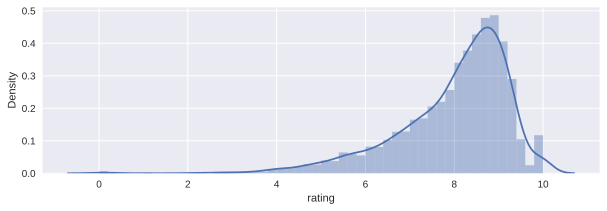

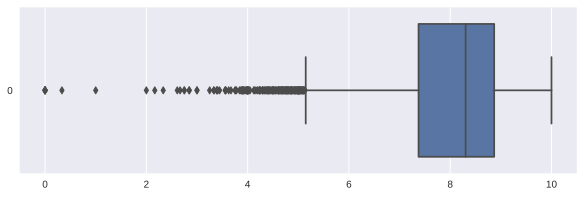

In [ ]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['rating'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['rating'].values, orient='h')
plt.show()

## Split

In [ ]:
df_pr.columns

Index(['age_access_type', 'name', 'type', 'release_year', 'duration',
       'element_uid', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       ...
       'Такер Гейтс', 'Крис Гилл', 'Майкл Кан', 'Джим Дено', 'Дариуш Вольски',
       'Харви Вайнштейн', 'Боб Вайнштейн', 'Адриан Политовски', 'Люк Бессон',
       'Стэн Ли'],
      dtype='object', length=1066)

In [ ]:
from sklearn.model_selection import train_test_split

sorted_df = df_pr.sort_values('release_year')

test = sorted_df[sorted_df['release_year'] == 2022]
train = sorted_df[sorted_df['release_year'] != 2022]

# for looking at samples
test_df = test.copy(deep=True)
train_df = train.copy(deep=True)

test.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)
train.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)

X_test, y_test = test.drop('rating', axis=1), test['rating']
X, y = train.drop('rating', axis=1), train['rating']
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.1, 
                                                  shuffle=False)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((4276, 1062), (476, 1062), (68, 1062), (4276,), (476,), (68,))

In [ ]:
X_train.columns[:40]

Index(['age_access_type', 'type', 'duration', 'BUDGET', 'MARKETING', 'RUS',
       'USA', 'WORLD', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer',
       'poster_url', 'poster_url_preview', 'has_imax', 'has_3_d', 'has_sequel',
       'джек', 'расследовать', 'подруга', 'ограбление', 'катя', 'макс',
       'мечтать', 'отважный', 'фрэнк', 'воспитывать', 'супергерой',
       'безжалостный', 'маньяк', 'эксцентричный', 'одержимый', 'влюбляться',
       'капитан', 'приключение', 'плен'],
      dtype='object')

In [ ]:
X_train

,age_access_type,type,duration,BUDGET,MARKETING,RUS,USA,WORLD,has_oscar_actor,has_oscar_composer,...,Такер Гейтс,Крис Гилл,Майкл Кан,Джим Дено,Дариуш Вольски,Харви Вайнштейн,Боб Вайнштейн,Адриан Политовски,Люк Бессон,Стэн Ли
4850,12,MOVIE,15.479437,NaN,NaN,13.270785,13.347369,17.921885,0,0,...,0,0,0,0,0,0,0,0,1,0
104,16,MOVIE,15.597220,17.216708,NaN,NaN,16.877041,16.877041,0,0,...,0,0,0,0,0,0,0,0,0,0
1243,18,MOVIE,16.039053,18.450240,17.56971,14.062371,19.050384,19.948006,0,0,...,0,0,0,0,0,0,0,0,0,0
974,12,MOVIE,15.617221,17.989898,NaN,NaN,17.446812,18.323362,0,0,...,0,0,0,0,0,0,0,0,0,0
959,16,MOVIE,15.720599,14.508658,NaN,NaN,14.271217,14.531609,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,6,MOVIE,15.627073,NaN,NaN,11.215395,NaN,15.471098,0,0,...,0,0,0,0,0,0,0,1,0,0
6866,6,MOVIE,15.396549,NaN,NaN,12.058477,NaN,13.370281,0,0,...,0,0,0,0,0,0,0,0,0,0
6863,12,MOVIE,15.512960,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4829,12,MOVIE,15.729488,NaN,NaN,10.309919,NaN,15.390878,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cat_features = ['age_access_type', 'type']

### Standartization


In [ ]:
# sc
from sklearn.preprocessing import StandardScaler

sc_cols = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD']

sc=StandardScaler()
sc_train = sc.fit_transform(X_train[sc_cols])

sc_train = pd.DataFrame(sc_train, index=X_train.index, columns=sc_cols)
X_train.drop(sc_cols, axis=1, inplace=True)
print(X_train.shape)
X_train = pd.concat([X_train, sc_train],axis=1)
print(X_train.shape)

# 
sc_val = sc.transform(X_val[sc_cols])
sc_val = pd.DataFrame(sc_val, index=X_val.index, columns=sc_cols)
X_val.drop(sc_cols, axis=1, inplace=True)
print(X_val.shape)
X_val = pd.concat([X_val, sc_val],axis=1) 
print(X_val.shape)

# 
sc_test = sc.transform(X_test[sc_cols])
sc_test = pd.DataFrame(sc_test, index=X_test.index, columns=sc_cols)
X_test.drop(sc_cols, axis=1, inplace=True)
print(X_test.shape)
X_test = pd.concat([X_test, sc_test],axis=1) 
print(X_test.shape)

(4276, 1056)
(4276, 1062)
(476, 1056)
(476, 1062)
(68, 1056)
(68, 1062)


In [ ]:
X_train.shape

(4276, 1062)

In [ ]:
X_test.head().T[-50:]

,8709,8646,8662,8746,46
сидень,0,0,0,0,0
беатрис,0,0,0,0,0
рыбка,0,0,0,0,0
Drama,0,0,1,1,0
Comedy,0,0,0,0,0
Thriller,0,1,0,0,0
Action,0,0,0,0,0
364fdc2e-bdfe-40be-b2c5-d30f43ec432e,1,0,0,0,0
Adventure,0,0,0,0,0
Sci-Fi,0,0,0,1,0


In [ ]:
X_train.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_val.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_test.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)

# Modeling

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [ ]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.063969
0:	learn: 0.9307692	test: 1.0495160	best: 1.0495160 (0)	total: 58.3ms	remaining: 58.2s
100:	learn: 0.6690671	test: 0.8498353	best: 0.8497345 (97)	total: 1.68s	remaining: 14.9s
200:	learn: 0.6392088	test: 0.8440738	best: 0.8437482 (188)	total: 2.72s	remaining: 10.8s
300:	learn: 0.6154606	test: 0.8438138	best: 0.8430214 (219)	total: 3.86s	remaining: 8.97s
400:	learn: 0.5970978	test: 0.8427177	best: 0.8416530 (328)	total: 5s	remaining: 7.46s
500:	learn: 0.5830543	test: 0.8446832	best: 0.8416530 (328)	total: 6.02s	remaining: 5.99s
600:	learn: 0.5689180	test: 0.8468550	best: 0.8416530 (328)	total: 7.68s	remaining: 5.1s
700:	learn: 0.5560537	test: 0.8486167	best: 0.8416530 (328)	total: 11.6s	remaining: 4.96s
800:	learn: 0.5448816	test: 0.8503404	best: 0.8416530 (328)	total: 13.9s	remaining: 3.44s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8416529954
bestIteration = 328

Shrink model to first 329 iterations.


In [ ]:
y_pred = cat_model.predict(test_dataset)

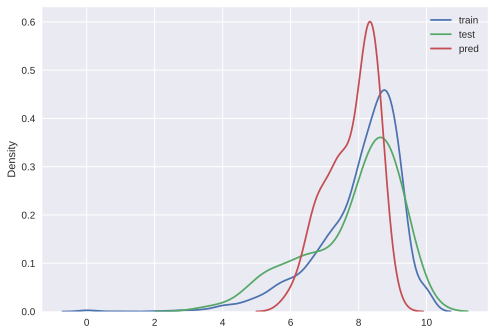

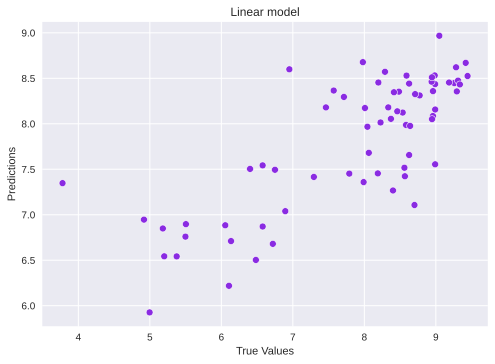

In [ ]:
target_distr_linear(y_train.values, y_test.values, y_pred)   

In [ ]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.8378831332789248
RMSE:  0.9153595650229066
R2:    0.5442963788402808
MAE:   0.7154256204511533
MedAE: 0.6626664812309317
------------------------------


In [ ]:
cat_model.save_model('cat_reg_okko_ratings_cat_ntop_scors_kws')

**Feature importance**

In [ ]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    imp_features_df = pd.DataFrame({"score":imp, "feat": cat_model.feature_names_})
    imp_features_df = imp_features_df.sort_values(by='score')[-20:]

    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp_features_df['score'].values, y=imp_features_df["feat"].values)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

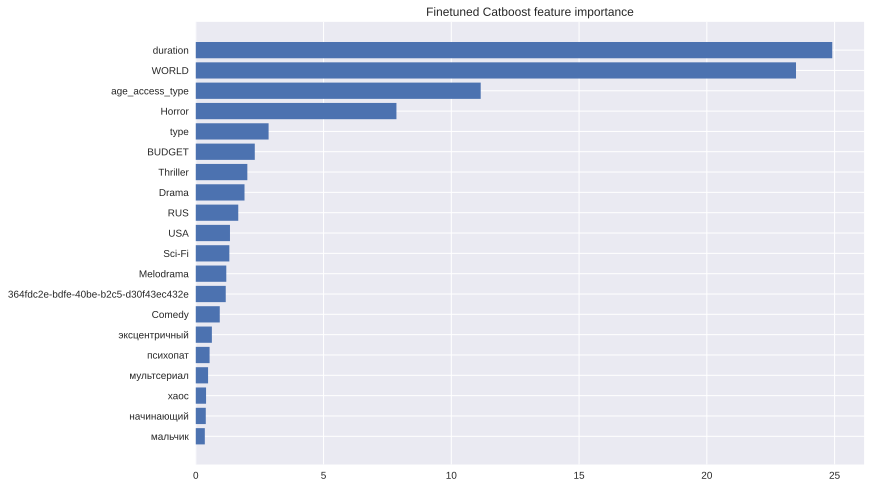

In [ ]:
get_feature_imp(cat_model, train_dataset)

1)  The most influential features:  
    - duration  
    - average_rating  
    - age_access_type  

2)  The lowest influential features:  
    - actors and directors are not so important

### Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import Pool
import shap

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=cat_features))

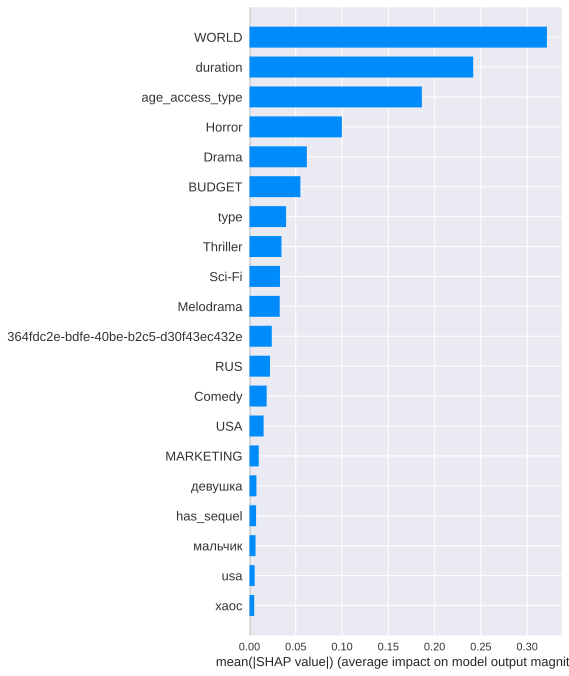

In [ ]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

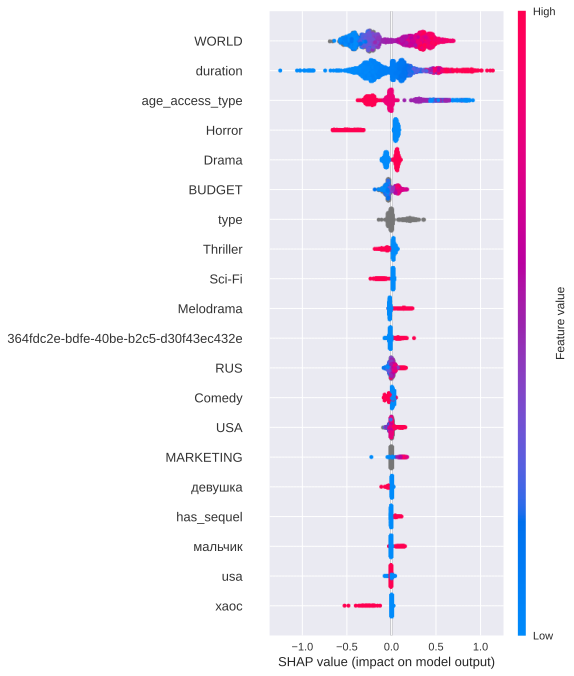

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

**Conclusion**
* The trend in the second figure is not visible, now we will confirm the presence of heteroskedasticity on tests.

In [ ]:
test_df['PREDS'] = y_pred.tolist()
test_df['TARGET'] = y_test.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Майкл Кан,Джим Дено,Дариуш Вольски,Харви Вайнштейн,Боб Вайнштейн,Адриан Политовски,Люк Бессон,Стэн Ли,PREDS,TARGET
8709,18,Не оставляй меня,SERIAL,2022,17.044733,00de4f79-d52d-4d2c-871c-e6e8432cc3df,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,8.447451,9.258333
8646,18,Индекс страха,SERIAL,2022,16.200597,e281b84c-bb78-466a-ac71-c557aacc5c13,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,8.123459,8.536232
8662,18,На взводе: Битва за UBER,SERIAL,2022,16.064695,fecde143-2a72-4a70-8efc-188079a62f1a,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,8.311675,8.773810
8746,18,Жена путешественника во времени,SERIAL,2022,16.626117,7becd8d8-1fb8-4ee6-b903-47817686ddd8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,8.436230,8.990000
46,16,Боец: Король ринга,MOVIE,2022,15.665539,1f2481e2-55ec-429f-9e3d-6c3ea2087d00,15.894952,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,7.656615,8.626496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,18,Отряд «Призрак»,MOVIE,2022,15.656060,f132627d-5b3b-443f-bccd-feb92b51d08d,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,7.494453,6.750000
4378,12,Падение Луны,MOVIE,2022,15.869634,595c19b8-a22f-4beb-ab9f-5431fd3929ea,18.826146,NaN,15.237295,16.763137,...,0,0,0,0,0,0,0,0,8.677680,7.979399
4380,16,Парни под прикрытием,MOVIE,2022,15.501910,1b9df53f-e556-4f00-8d1f-67b2cc74e01a,NaN,NaN,12.266231,NaN,...,0,0,0,0,0,0,0,0,6.759357,5.497999
3359,16,9 жизней,MOVIE,2022,15.566448,a7979b64-cf82-4c7f-86d8-05670b07d1b0,NaN,NaN,12.154206,NaN,...,0,0,0,0,0,0,0,0,7.266680,8.400693


# Tuning

In [ ]:
train_dataset = cat.Pool(X_train, y_train, 
                         cat_features=cat_features) 

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [ ]:
parameters_distr = {'depth': randint(5, 10),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [5000, 10000, 15000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
                          n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_okko_rat_ntop_scrs_kws', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.9461786	total: 36.2ms	remaining: 3m
1:	learn: 0.9425795	total: 56.9ms	remaining: 2m 22s
2:	learn: 0.9387623	total: 73.5ms	remaining: 2m 2s
3:	learn: 0.9354461	total: 89.1ms	remaining: 1m 51s
4:	learn: 0.9313915	total: 104ms	remaining: 1m 44s
5:	learn: 0.9278363	total: 119ms	remaining: 1m 39s
6:	learn: 0.9243072	total: 134ms	remaining: 1m 35s
7:	learn: 0.9203686	total: 152ms	remaining: 1m 34s
8:	learn: 0.9168133	total: 166ms	remaining: 1m 32s
9:	learn: 0.9133722	total: 183ms	remaining: 1m 31s
10:	learn: 0.9102111	total: 197ms	remaining: 1m 29s
11:	learn: 0.9068858	total: 211ms	remaining: 1m 27s
12:	learn: 0.9037224	total: 225ms	remaining: 1m 26s
13:	learn: 0.9003282	total: 241ms	remaining: 1m 25s
14:	learn: 0.8973832	total: 267ms	remaining: 1m 28s
15:	learn: 0.8945190	total: 281ms	remaining: 1m 27s
16:	learn: 0.8916850	total: 288ms	remaining: 1m 24s
17:	learn: 0.8884779	total: 302ms	remaining: 1m 23s
18:	lea

{'depth': 7, 'iterations': 5000, 'learning_rate': 0.01165611244846967}

In [ ]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 7, 'iterations': 5000, 'learning_rate': 0.01165611244846967}

In [ ]:
grid.best_score_

0.27022309192391647

In [ ]:
best_cat.save_model('parsed_ratings_okko_tune_ntop_scrs_kws')

In [ ]:
y_pred = best_cat.predict(test_dataset)

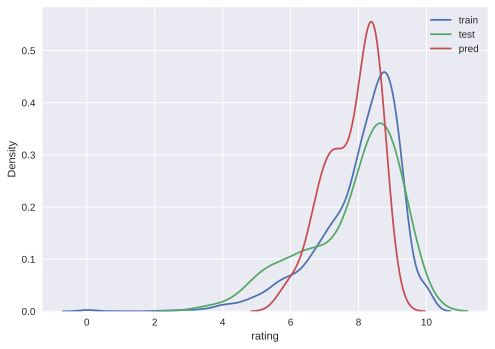

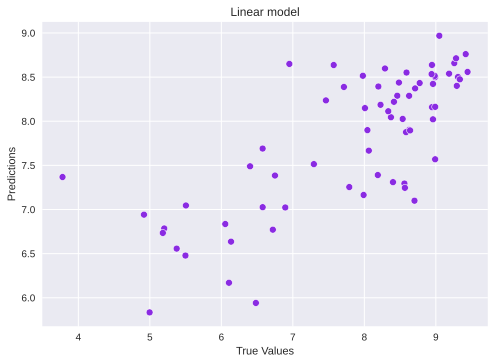

In [ ]:
target_distr_linear(y_train, y_test, y_pred)  

In [ ]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.8548698933271452
RMSE:  0.9245917441374573
R2:    0.5350577060966819
MAE:   0.7230788277362884
MedAE: 0.6405018678513068
------------------------------


In [ ]:
# calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.8716029527064778
RMSE:  0.9335967827207192
R2:    0.5259570147837993
MAE:   0.7254158283041264
MedAE: 0.6351808300061235
------------------------------


In [ ]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    imp_features_df = pd.DataFrame({"score":imp, "feat": model.feature_names_})
    imp_features_df = imp_features_df.sort_values(by='score')[-20:]

    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp_features_df['score'].values, y=imp_features_df["feat"].values)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

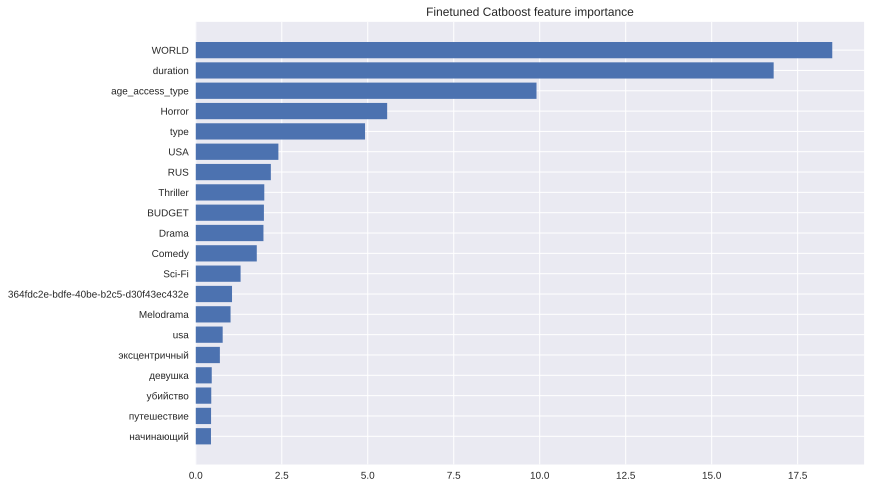

In [ ]:
get_feature_imp(best_cat, train_dataset)

In [ ]:
test_df['PREDS_tune'] = y_pred.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Джим Дено,Дариуш Вольски,Харви Вайнштейн,Боб Вайнштейн,Адриан Политовски,Люк Бессон,Стэн Ли,PREDS,TARGET,PREDS_tune
8709,18,Не оставляй меня,SERIAL,2022,17.044733,00de4f79-d52d-4d2c-871c-e6e8432cc3df,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,8.447451,9.258333,8.657986
8646,18,Индекс страха,SERIAL,2022,16.200597,e281b84c-bb78-466a-ac71-c557aacc5c13,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,8.123459,8.536232,8.026008
8662,18,На взводе: Битва за UBER,SERIAL,2022,16.064695,fecde143-2a72-4a70-8efc-188079a62f1a,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,8.311675,8.773810,8.432373
8746,18,Жена путешественника во времени,SERIAL,2022,16.626117,7becd8d8-1fb8-4ee6-b903-47817686ddd8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,8.436230,8.990000,8.498107
46,16,Боец: Король ринга,MOVIE,2022,15.665539,1f2481e2-55ec-429f-9e3d-6c3ea2087d00,15.894952,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7.656615,8.626496,7.902181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,18,Отряд «Призрак»,MOVIE,2022,15.656060,f132627d-5b3b-443f-bccd-feb92b51d08d,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7.494453,6.750000,7.384549
4378,12,Падение Луны,MOVIE,2022,15.869634,595c19b8-a22f-4beb-ab9f-5431fd3929ea,18.826146,NaN,15.237295,16.763137,...,0,0,0,0,0,0,0,8.677680,7.979399,8.514841
4380,16,Парни под прикрытием,MOVIE,2022,15.501910,1b9df53f-e556-4f00-8d1f-67b2cc74e01a,NaN,NaN,12.266231,NaN,...,0,0,0,0,0,0,0,6.759357,5.497999,6.477934
3359,16,9 жизней,MOVIE,2022,15.566448,a7979b64-cf82-4c7f-86d8-05670b07d1b0,NaN,NaN,12.154206,NaN,...,0,0,0,0,0,0,0,7.266680,8.400693,7.309703


In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(best_cat)
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=cat_features))

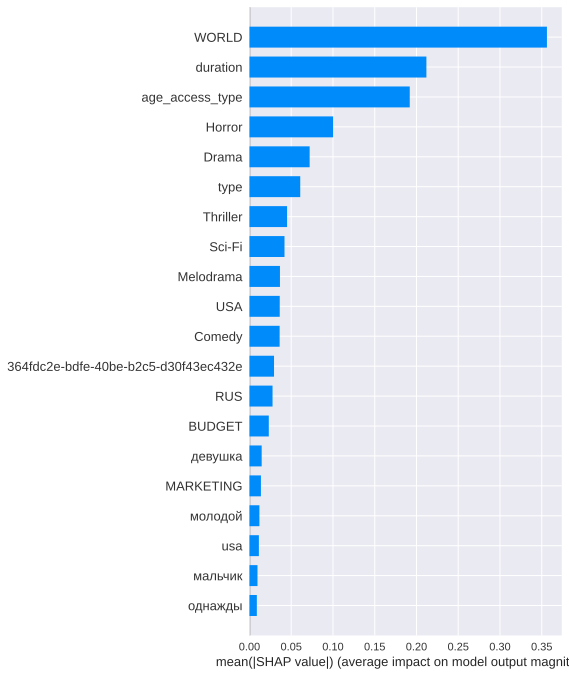

In [ ]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

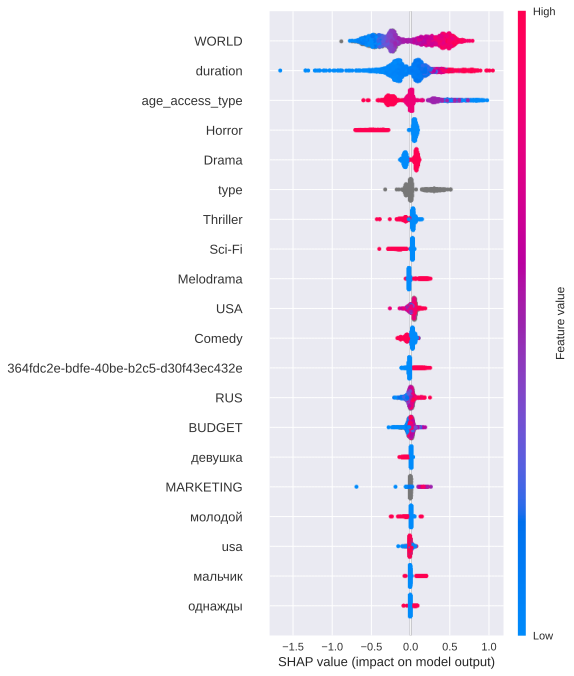

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)